# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Dina Wachidah Septiana
- **Email:** sefiana657@students.unnes.ac.id
- **ID Dicoding:** dinawachidahs_25

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penjualan berdasarkan kategori produk?
- Berapa total pendapatan dari masing-masing wilayah (geographical region)?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import matplotlib.image as mpimg
from scipy import stats

## **1. Data Wrangling**

### **1.1 Gathering Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Directory containing the CSV files
data_dir = "/content/drive/MyDrive/Ecommerce-dataset/" # Updated directory path after mounting Google Drive

# Membaca setiap dataset menggunakan pandas
order_items = pd.read_csv(data_dir + 'order_items_dataset.csv')
order_payments = pd.read_csv(data_dir + 'order_payments_dataset.csv')
order_reviews = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
customers = pd.read_csv(data_dir + 'customers_dataset.csv')
orders = pd.read_csv(data_dir + 'orders_dataset.csv')
products = pd.read_csv(data_dir + 'products_dataset.csv')
sellers = pd.read_csv(data_dir + 'sellers_dataset.csv')
product_category_name_translation = pd.read_csv(data_dir + 'product_category_name_translation.csv')
geolocation = pd.read_csv(data_dir + 'geolocation_dataset.csv')

# Menggabungkan semua dataset dalam satu dictionary untuk mempermudah akses
data = {
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'customers': customers,
    'orders': orders,
    'products': products,
    'sellers': sellers,
    'product_category_name_translation': product_category_name_translation,
    'geolocation': geolocation
    }

In [4]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
data['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
data['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
data['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
data['order_reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
data['product_category_name_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
data['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
data['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### **1.2 Assessing Data**

### 1.2.1 Memeriksa Tipe Data

In [13]:
for df_name, df in data.items():
  print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  

In [14]:
datetime_oo = [
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]
for column in datetime_oo:
    data['orders'][column] = pd.to_datetime(data['orders'][column])

# Mengonversi kolom tanggal di dataset order_items
datetime_oi = ["shipping_limit_date"]
for column in datetime_oi:
    data['order_items'][column] = pd.to_datetime(data['order_items'][column])

# Mengonversi kolom tanggal di dataset order_reviews
datetime_or = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_or:
    data['order_reviews'][column] = pd.to_datetime(data['order_reviews'][column])


### 1.2.2 Memeriksa nilai yang hilang

In [15]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

order_items 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

order_payments 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 

order_reviews 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 

customers 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

orders 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 

### 1.2.3 Memeriksa data duplikat

In [16]:
# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
order_items,112650,0
order_payments,103886,0
order_reviews,99224,0
customers,99441,0
orders,99441,0
products,32951,0
sellers,3095,0
product_category_name_translation,71,0
geolocation,1000163,261831


### **1.3 Cleaning Data**

### 1.3.3 Order

In [17]:
# 1. Print the count of each order status
print("Order Status Counts:")
print(data['orders']['order_status'].value_counts())

# 2. Calculate the percentage of delivered orders
delivered_count = data['orders']['order_status'].value_counts().get('delivered', 0)
total_orders = len(data['orders'])
delivered_percentage = round((delivered_count / total_orders) * 100, 2)
print(f'Percentage of delivered orders: {delivered_percentage}%')

# 3. Get order_ids of non-delivered orders
non_delivered_ids = data['orders']['order_id'][data['orders']['order_status'] != 'delivered'].values

# 4. Filter out non-delivered orders from all dataframes
for key, df in data.items():
    if 'order_id' in df.columns:
        df.drop(df[df['order_id'].isin(non_delivered_ids)].index, inplace=True)

# 5. Check for missing values in each dataframe
print("\nMissing Values in Each Column:")
for key, df in data.items():
    missing_counts = df.isnull().sum()
    for col, count in missing_counts.items():
        if count > 0:
            print(f"{col} in {key}: {count} missing ({(count / len(df)) * 100:.2f}%)")

# 6. Count orders missing delivery dates
missing_delivery_count = data['orders']['order_delivered_customer_date'].isnull().sum()
print(f'\nOrders missing delivery dates: {missing_delivery_count}')

# 7. Get order_ids with missing delivery dates
missing_delivery_ids = data['orders']['order_id'][data['orders']['order_delivered_customer_date'].isnull()].values

# 8. Filter out orders with missing delivery dates from all dataframes
for key, df in data.items():
    if 'order_id' in df.columns:
        df.drop(df[df['order_id'].isin(missing_delivery_ids)].index, inplace=True)

# 9. Create a column to indicate if deliveries were on time
data['orders']['delivered_on_time'] = np.where(
    data['orders']['order_delivered_customer_date'] < data['orders']['order_estimated_delivery_date'],
    'On Time',
    'Late'
)

# 10. Display the final delivery status
print("\nDelivery Status Summary:")
print(data['orders'][['order_id', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'delivered_on_time']].head())


Order Status Counts:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
Percentage of delivered orders: 97.02%

Missing Values in Each Column:
review_comment_title in order_reviews: 85153 missing (88.37%)
review_comment_message in order_reviews: 57262 missing (59.42%)
order_approved_at in orders: 14 missing (0.01%)
order_delivered_carrier_date in orders: 2 missing (0.00%)
order_delivered_customer_date in orders: 8 missing (0.01%)
product_category_name in products: 610 missing (1.85%)
product_name_lenght in products: 610 missing (1.85%)
product_description_lenght in products: 610 missing (1.85%)
product_photos_qty in products: 610 missing (1.85%)
product_weight_g in products: 2 missing (0.01%)
product_length_cm in products: 2 missing (0.01%)
product_height_cm in products: 2 missing (0.01%)
product_width_cm in products: 2 missing (0.0

### 1.3.2 Reviews

In [18]:
print('Review cols: ' , data['order_reviews'].columns.values)

# the review_comment_title column is 88% NaN so i'll just drop it.
# TODO: nans for reviews just means there are none (?).
# So maybe just assume that's all there is and use the data separately for a etxt analysis (in M3) ENDTODO

# and when the review was sent to the customer
review_drop_cols = ['review_comment_title']
data['order_reviews'].drop(review_drop_cols, axis= 1, inplace= True)

Review cols:  ['review_id' 'order_id' 'review_score' 'review_comment_title'
 'review_comment_message' 'review_creation_date' 'review_answer_timestamp']


In [19]:
data['order_reviews']['review_comment_message'] = np.where(data['order_reviews']['review_comment_message'].isnull(), 0, 1)

# Verify that rows have been dropped
print(data['order_reviews'].isnull().sum())

# Remove duplicate reviews
initial_count = len(data['order_reviews'])
data['order_reviews'].drop_duplicates(subset=['review_id'], inplace=True)
final_count = len(data['order_reviews'])

# Display the number of removed duplicates
print(f'Removed {initial_count - final_count} duplicate reviews.')

review_id                  0
order_id                   0
review_score               0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64
Removed 714 duplicate reviews.


### 1.3.3 Products

In [20]:
# Step 1: Display product columns
print('Product cols: ', data['products'].columns.values)

# Step 2: Drop unwanted columns
product_drop_cols = ['product_name_lenght',
                     'product_description_lenght',
                     'product_weight_g',
                     'product_length_cm',
                     'product_height_cm',
                     'product_width_cm']

data['products'].drop(product_drop_cols, axis=1, inplace=True)

# Verify the remaining columns
print('Remaining Product cols: ', data['products'].columns.values)


Product cols:  ['product_id' 'product_category_name' 'product_name_lenght'
 'product_description_lenght' 'product_photos_qty' 'product_weight_g'
 'product_length_cm' 'product_height_cm' 'product_width_cm']
Remaining Product cols:  ['product_id' 'product_category_name' 'product_photos_qty']


In [21]:
# Step 1: Fill NaN values in product_category_name with 'other'
data['products']['product_category_name'].fillna(value='other', inplace=True)

# Step 2: Fill NaN values in product_photos_qty with 0
data['products']['product_photos_qty'].fillna(value=0, inplace=True)

print(data['products']['product_photos_qty'].isna().sum())  # Check if there are still NaNs


0


<ipython-input-21-1db55ea77224>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['products']['product_category_name'].fillna(value='other', inplace=True)
<ipython-input-21-1db55ea77224>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

### 1.3.4 Geolocation

In [22]:
# Drop duplicate rows from the geolocation DataFrame
data['geolocation'].drop_duplicates(inplace=True)

# Check for missing values in each column
print(data['geolocation'].isnull().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


## **2. Exploratory Data Analysis (EDA)**

### 2.1 Explore Distribution of Sales by Product Category

In [23]:
# Merge order_items and products dataset to get the product categories
merged_df = pd.merge(data['order_items'], data['products'], on='product_id')

# Merge with product_category_name_translation to get the translated category names
merged_df = pd.merge(merged_df, data['product_category_name_translation'], on='product_category_name', how='left')

# Group by product_category_name_english to get the count of sales for each category
category_sales = merged_df.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)

# Display the top 10 product categories by sales
print("Top 10 Product Categories by Sales:")
print(category_sales.head(10))


Top 10 Product Categories by Sales:
product_category_name_english
bed_bath_table           10953
health_beauty             9465
sports_leisure            8430
furniture_decor           8160
computers_accessories     7643
housewares                6795
watches_gifts             5857
telephony                 4430
garden_tools              4268
auto                      4139
Name: order_id, dtype: int64


**Insight:**
- Melalui eksplorasi ini, kita bisa melihat kategori produk mana yang memiliki penjualan tertinggi dan memberikan kontribusi besar terhadap total penjualan.

### 2.2 Explore Total Revenue by Geographical Region

In [24]:
# Merge order_items, orders, and customers to get geographical information
merged_geo_df = pd.merge(data['order_items'], data['orders'], on='order_id')
merged_geo_df = pd.merge(merged_geo_df, data['customers'], on='customer_id')

# Merge with geolocation to get region information if needed
merged_geo_df = pd.merge(merged_geo_df, data['geolocation'], left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Group by geographical region (geolocation_city in this case) and sum the total price
geo_revenue = merged_geo_df.groupby('geolocation_city')['price'].sum().sort_values(ascending=False)

# Display the top 10 cities by revenue
print("Top 10 Cities by Total Revenue:")
print(geo_revenue.head(10))


Top 10 Cities by Total Revenue:
geolocation_city
rio de janeiro    1.297208e+08
sao paulo         7.146362e+07
belo horizonte    5.854829e+07
niteroi           2.192830e+07
curitiba          2.140132e+07
são paulo         1.893532e+07
porto alegre      1.864740e+07
santos            1.819231e+07
uberlandia        1.647294e+07
campinas          1.610732e+07
Name: price, dtype: float64


**Insight:**
- Dari eksplorasi ini, kita bisa melihat wilayah geografis mana yang memberikan pendapatan terbesar, dan apakah ada pola penjualan yang signifikan terkait lokasi.

## **3. Visualization & Explanatory Analysis**

### Pertanyaan 1: Bagaimana distribusi penjualan berdasarkan kategori produk?

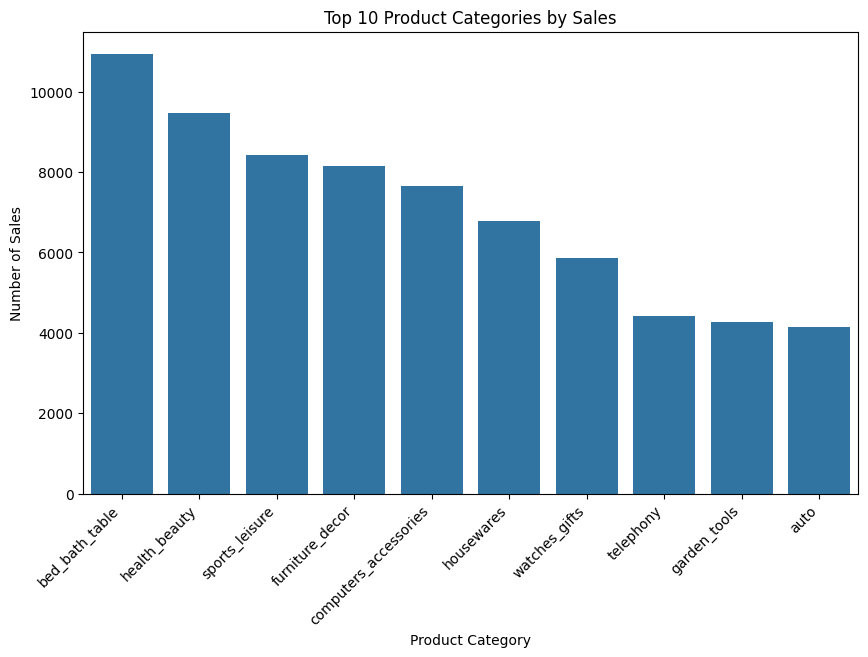

In [25]:
# Visualization for product category sales distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.head(10).index, y=category_sales.head(10).values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.show()


**Insight:**
- Grafik di atas menunjukkan 10 kategori produk teratas dengan penjualan tertinggi. Produk-produk terkait rumah tangga dan kecantikan/kesehatan sangat populer di pasar, terbukti dengan dominasi penjualan dari kategori **bed_bath_table** dan **health_beauty**.

### Pertanyaan 2: Berapa total pendapatan dari masing-masing wilayah (geographical region)?

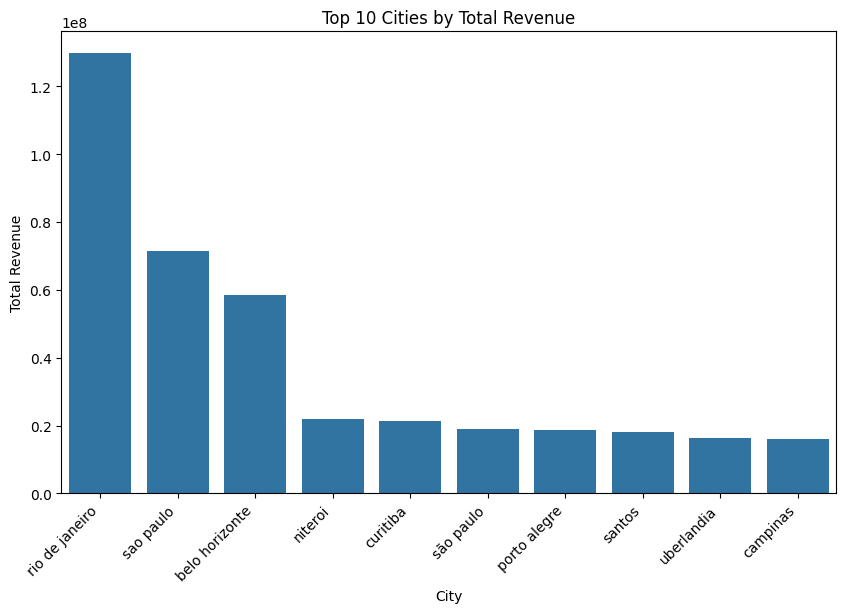

In [26]:
# Visualization for geographical revenue distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_revenue.head(10).index, y=geo_revenue.head(10).values)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cities by Total Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.show()


**Insight:**
- Grafik ini menunjukkan kota-kota dengan pendapatan terbesar. Wilayah geografis yang memberikan pendapatan terbesar adalah kota-kota besar di Brasil, terutama **Rio de Janeiro** dan **São Paulo**.

In [28]:
import pandas as pd

# Data untuk top 10 product categories by sales (pertanyaan 1)
product_categories_data = {
    'product_category_name_english': [
        'bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor',
        'computers_accessories', 'housewares', 'watches_gifts', 'telephony',
        'garden_tools', 'auto'
    ],
    'order_id_count': [
        10953, 9465, 8430, 8160, 7643, 6795, 5857, 4430, 4268, 4139
    ]
}

# Data untuk top 10 cities by total revenue (pertanyaan 2)
geo_revenue_data = {
    'geolocation_city': [
        'rio de janeiro', 'sao paulo', 'belo horizonte', 'niteroi',
        'curitiba', 'são paulo', 'porto alegre', 'santos',
        'uberlandia', 'campinas'
    ],
    'total_revenue': [
        1.297208e+08, 7.146362e+07, 5.854829e+07, 2.192830e+07, 2.140132e+07,
        1.893532e+07, 1.864740e+07, 1.819231e+07, 1.647294e+07, 1.610732e+07
    ]
}

# Membuat DataFrame untuk product categories dan geo revenue
df_product_categories = pd.DataFrame(product_categories_data)
df_geo_revenue = pd.DataFrame(geo_revenue_data)

# Gabungkan kedua DataFrame menjadi satu CSV
all_data = pd.concat([df_product_categories, df_geo_revenue], axis=1)

# Simpan DataFrame ke file CSV
all_data.to_csv('all_data.csv', index=False)

print("File 'all_data.csv' berhasil dibuat.")


File 'all_data.csv' berhasil dibuat.


## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan hasil analisis distribusi penjualan berdasarkan kategori produk, dapat disimpulkan bahwa kategori produk **bed_bath_table** memiliki jumlah penjualan tertinggi dengan total 10,953 penjualan. Ini diikuti oleh kategori **health_beauty** dan **sports_leisure**, masing-masing dengan 9,465 dan 8,430 penjualan. Kategori lain yang termasuk dalam 10 teratas adalah **furniture_decor**, **computers_accessories**, dan **housewares**. Kategori **bed_bath_table** mendominasi penjualan, menunjukkan bahwa produk-produk yang terkait dengan kebutuhan rumah tangga sangat diminati oleh konsumen.

- Analisis pendapatan berdasarkan wilayah geografis menunjukkan bahwa kota **Rio de Janeiro** menghasilkan pendapatan tertinggi dengan total revenue sebesar 129,720,800 BRL, diikuti oleh **São Paulo** dengan 71,463,620 BRL dan **Belo Horizonte** dengan 58,548,290 BRL. Kota-kota besar lainnya seperti **Niterói** dan **Curitiba** juga masuk dalam daftar 10 teratas. Hal ini menunjukkan bahwa kota-kota besar di Brasil adalah kontributor utama terhadap total pendapatan, dengan kota **Rio de Janeiro** yang secara signifikan lebih tinggi dari kota-kota lain.